# EXP 1: LANGUAGE heritability subtype from r-maps

##### Subtype:
- Niak preprocessed LANGUAGE task (new scrub method)
- BASC partition scale 69
- Connectome maps from:
```
   opt_csv.labels_x = { 'BROCA_L' , 'PSTG_L' , 'MTG_L','ANTERIOR_POLE_L' }; % network labels 
   opt_csv.labels_y = { 'index' };
   tab = [2;30;38;34];
```
- 5 subtype
- **FD_scrubbed run1 (LR) regressed out befor building subtypes**

##### Heritability:
- Regress "FD_scrubbed" "Age_in_Yrs" "Gender" as covariate


## Build Pheno file

### Merge behavioral variables with subtypes weights

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display

In [4]:
# Set up the paths to the files we want to work with
base_path = "/media/yassinebha/database27/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_LANGUAGE_RL-LR_19-Dec-2016/networks/"
sbt_name_pattern = "sbt_weights_net_{}.csv"
pheno_path = '/media/yassinebha/database27/Drive/HCP/subtypes_scores/26-10-2016/pheno/language_RL-LR_pheno_scrub_raw_19-Dec-2016.csv'
out_path = '/media/yassinebha/database27/Drive/HCP/Solar_heritability/HCP_subtype/'
solar_script = 'fcd_solar_h2r.sh'
pheno_save = 'solar_language_RL-LR_pheno.csv'
pedig_save = 'solar_language_RL-LR_pedigre.csv'
solar_out = 'subtype_5_language_EXP1'
solar_cov = '    cov FD_scrubbed Gender'

In [5]:
# List of network names
net_names = os.listdir(base_path)
net_names

['MTG_L', 'BROCA_L', 'ANTERIOR_POLE_L', 'PSTG_L']

In [6]:
# Loop over each network and build weight file
for index, net in enumerate(net_names):
    file_path = os.path.join(base_path, net, sbt_name_pattern.format(net))
    if not os.path.exists(file_path):
        print("Hello, {} does not exist".format(file_path))
    
    tmp_weights = pd.read_csv(file_path)
    # Rename first column
    tmp_weights.rename(columns={" ":"Subject"}, inplace=True)
    tmp_weights.Subject = tmp_weights.Subject.str.strip(" ")
    
    rename_dict = dict()
    for colname in tmp_weights.columns:
        if colname == "Subject":
            continue
        else:
            new_name = "{}_{}".format(net, colname)
            # Get rid of trailing whitespace
            new_name = new_name.strip(" ")
            rename_dict[colname] = new_name

    tmp_weights.rename(columns=rename_dict, inplace=True)
    
    if index==0:
        dataframe = tmp_weights
    else:
        dataframe = pd.merge(dataframe, tmp_weights, on="Subject", how="inner")

In [7]:
dataframe.head()

,Subject,MTG_L_sub1,MTG_L_sub2,MTG_L_sub3,MTG_L_sub4,MTG_L_sub5,BROCA_L_sub1,BROCA_L_sub2,BROCA_L_sub3,BROCA_L_sub4,...,ANTERIOR_POLE_L_sub1,ANTERIOR_POLE_L_sub2,ANTERIOR_POLE_L_sub3,ANTERIOR_POLE_L_sub4,ANTERIOR_POLE_L_sub5,PSTG_L_sub1,PSTG_L_sub2,PSTG_L_sub3,PSTG_L_sub4,PSTG_L_sub5
0,HCP100206,-0.165,-0.080,-0.431,0.130,0.445,-0.371,0.302,-0.464,-0.024,...,-0.109,0.043,-0.155,0.205,-0.079,0.061,0.573,-0.126,0.069,-0.515
1,HCP100307,0.033,-0.188,-0.007,0.116,0.009,-0.382,0.186,-0.208,0.207,...,-0.068,0.090,-0.087,0.033,0.081,0.211,0.058,0.045,-0.119,-0.200
2,HCP100408,0.194,0.013,0.216,-0.169,-0.212,-0.140,0.145,-0.002,-0.009,...,0.033,-0.064,0.144,-0.127,0.018,-0.125,-0.285,0.109,0.040,0.244
3,HCP100610,0.097,0.007,0.264,-0.059,-0.266,0.296,-0.032,0.232,-0.270,...,0.021,0.045,0.032,-0.150,0.208,0.009,-0.208,-0.026,0.043,0.162
4,HCP101006,-0.179,-0.201,-0.453,0.183,0.486,-0.254,0.145,-0.108,-0.035,...,-0.070,0.152,-0.207,0.166,-0.032,-0.113,-0.077,0.007,0.071,0.114


In [8]:
dataframe.Subject.describe()

count           814
unique          814
top       HCP677968
freq              1
Name: Subject, dtype: object

In [9]:
# Load pheno file
file_weight = dataframe
file_pheno = pd.read_csv(pheno_path)

In [10]:
file_pheno.head()

,Subject,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID,Handedness,BMI,Gender,ReadEng_Unadj,PicVocab_Unadj,ListSort_Unadj,FD,FD_scrubbed
0,HCP100206,27,NotTwin,NotTwin,56037,85858.0,65,26.64,M,113.5460,119.89140,112.89,0.088456,0.088456
1,HCP100307,27,Twin,NotMZ,51488,81352.0,95,22.96,F,111.0700,107.20000,108.06,0.101970,0.101970
2,HCP100408,33,Twin,MZ,51730,81594.0,55,27.75,M,131.8100,134.24000,108.06,0.128052,0.128052
3,HCP100610,27,Twin,NotMZ,52813,82634.0,85,36.91,M,141.3166,140.81510,117.39,0.189474,0.189474
4,HCP101006,35,Twin,MZ,51283,81149.0,90,30.27,F,113.5374,95.42348,93.90,0.156877,0.156877


In [11]:
file_pheno.Subject.describe()

count           815
unique          815
top       HCP677968
freq              1
Name: Subject, dtype: object

In [12]:
# Select a subset of variable
file_pheno_subset = file_pheno[["Subject","Age_in_Yrs","Handedness","Gender","BMI","FD","FD_scrubbed"]]
file_pheno_subset.head()

,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD,FD_scrubbed
0,HCP100206,27,65,M,26.64,0.088456,0.088456
1,HCP100307,27,95,F,22.96,0.101970,0.101970
2,HCP100408,33,55,M,27.75,0.128052,0.128052
3,HCP100610,27,85,M,36.91,0.189474,0.189474
4,HCP101006,35,90,F,30.27,0.156877,0.156877


In [13]:
# Replace gender M=1 and F=2
file_pheno_subset.Gender.replace({'M':1,'F':2}, inplace=True)
file_pheno_subset.head()

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3547: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD,FD_scrubbed
0,HCP100206,27,65,1,26.64,0.088456,0.088456
1,HCP100307,27,95,2,22.96,0.101970,0.101970
2,HCP100408,33,55,1,27.75,0.128052,0.128052
3,HCP100610,27,85,1,36.91,0.189474,0.189474
4,HCP101006,35,90,2,30.27,0.156877,0.156877


In [14]:
file_pheno_subset[["Subject"]].describe()

,Subject
count,815
unique,815
top,HCP677968
freq,1


In [15]:
file_weight[["Subject"]].describe()

,Subject
count,814
unique,814
top,HCP677968
freq,1


In [16]:
# Merge weight with subset of pheno variables
merged_weight_pheno = pd.merge(file_weight, file_pheno_subset, on='Subject', how='left')
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,MTG_L_sub1,MTG_L_sub2,MTG_L_sub3,MTG_L_sub4,MTG_L_sub5,BROCA_L_sub1,BROCA_L_sub2,BROCA_L_sub3,BROCA_L_sub4,...,PSTG_L_sub2,PSTG_L_sub3,PSTG_L_sub4,PSTG_L_sub5,Age_in_Yrs,Handedness,Gender,BMI,FD,FD_scrubbed
0,HCP100206,-0.165,-0.080,-0.431,0.130,0.445,-0.371,0.302,-0.464,-0.024,...,0.573,-0.126,0.069,-0.515,27,65,1,26.64,0.088456,0.088456
1,HCP100307,0.033,-0.188,-0.007,0.116,0.009,-0.382,0.186,-0.208,0.207,...,0.058,0.045,-0.119,-0.200,27,95,2,22.96,0.101970,0.101970
2,HCP100408,0.194,0.013,0.216,-0.169,-0.212,-0.140,0.145,-0.002,-0.009,...,-0.285,0.109,0.040,0.244,33,55,1,27.75,0.128052,0.128052
3,HCP100610,0.097,0.007,0.264,-0.059,-0.266,0.296,-0.032,0.232,-0.270,...,-0.208,-0.026,0.043,0.162,27,85,1,36.91,0.189474,0.189474
4,HCP101006,-0.179,-0.201,-0.453,0.183,0.486,-0.254,0.145,-0.108,-0.035,...,-0.077,0.007,0.071,0.114,35,90,2,30.27,0.156877,0.156877


In [17]:
merged_weight_pheno.ID.describe()

count           814
unique          814
top       HCP677968
freq              1
Name: ID, dtype: object

In [18]:
# Check if there is empty value in BMI
sum(merged_weight_pheno.BMI.isnull())

1

In [19]:
# Save the merged file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

## Build trait file

In [20]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender']]
new_list

['MTG_L_sub1',
 'MTG_L_sub2',
 'MTG_L_sub3',
 'MTG_L_sub4',
 'MTG_L_sub5',
 'BROCA_L_sub1',
 'BROCA_L_sub2',
 'BROCA_L_sub3',
 'BROCA_L_sub4',
 'BROCA_L_sub5',
 'ANTERIOR_POLE_L_sub1',
 'ANTERIOR_POLE_L_sub2',
 'ANTERIOR_POLE_L_sub3',
 'ANTERIOR_POLE_L_sub4',
 'ANTERIOR_POLE_L_sub5',
 'PSTG_L_sub1',
 'PSTG_L_sub2',
 'PSTG_L_sub3',
 'PSTG_L_sub4',
 'PSTG_L_sub5',
 'Handedness',
 'BMI',
 'FD',
 'FD_scrubbed']

In [21]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [22]:
# Select a subset of variable from pheno file
file_pheno_pedig = file_pheno[["Subject","Twin_Stat","Zygosity","Mother_ID","Gender"]]
file_pheno_pedig.head()

,Subject,Twin_Stat,Zygosity,Mother_ID,Gender
0,HCP100206,NotTwin,NotTwin,56037,M
1,HCP100307,Twin,NotMZ,51488,F
2,HCP100408,Twin,MZ,51730,M
3,HCP100610,Twin,NotMZ,52813,M
4,HCP101006,Twin,MZ,51283,F


In [23]:
file_pheno_pedig.Subject.describe()

count           815
unique          815
top       HCP677968
freq              1
Name: Subject, dtype: object

In [24]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.Zygosity == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [25]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.Subject
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.replace(to_replace={"M":1, "F":2})
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


tail


,ID,fa,mo,sex,mztwin,hhID
810,HCP992673,fa_56143,mo_56143,2,,hh_56143
811,HCP992774,fa_51345,mo_51345,1,,hh_51345
812,HCP993675,fa_55800,mo_55800,2,,hh_55800
813,HCP994273,fa_52364,mo_52364,1,,hh_52364
814,HCP996782,fa_51541,mo_51541,2,,hh_51541


ID        815
fa        815
mo        815
sex       815
mztwin    815
hhID      815
dtype: int64

In [26]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
# for idx, twin in enumerate(uniques):
#     print("{} occurs {} times".format(twin, twin_counts[idx]))

In [27]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [28]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [29]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(row.ID))
display(df_single_pedig.head())
df_single_pedig.count()

,ID,fa,mo,sex,mztwin,hhID
39,M_HCP110007,fa_54572,mo_54572,2,pair_54572,hh_54572
56,M_HCP114823,fa_52925,mo_52925,2,pair_52925,hh_52925
83,M_HCP122317,fa_51802,mo_51802,1,pair_51802,hh_51802
88,M_HCP123824,fa_56022,mo_56022,1,pair_56022,hh_56022
91,M_HCP124422,fa_51529,mo_51529,2,pair_51529,hh_51529


ID        40
fa        40
mo        40
sex       40
mztwin    40
hhID      40
dtype: int64

In [30]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


In [31]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
707,M_HCP769064,fa_52803,mo_52803,1,pair_52803,hh_52803
734,M_HCP835657,fa_52137,mo_52137,2,pair_52137,hh_52137
736,M_HCP837964,fa_52875,mo_52875,2,pair_52875,hh_52875
777,M_HCP904044,fa_51290,mo_51290,2,pair_51290,hh_51290
802,M_HCP972566,fa_56077,mo_56077,2,pair_56077,hh_56077


In [32]:
df_pedig_final.count()

ID        855
fa        855
mo        855
sex       855
mztwin    855
hhID      855
dtype: int64

In [33]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

In [34]:
import sys

def query_yes_no(question, default="yes"):
    """Ask a yes/no question via input() and return their answer.

    "question" is a string that is presented to the user.
    "default" is the presumed answer if the user just hits <Enter>.
        It must be "yes" (the default), "no" or None (meaning
        an answer is required of the user).

    The "answer" return value is True for "yes" or False for "no".
    """
    valid = {"yes": True, "y": True, "ye": True,
             "no": False, "n": False}
    if default is None:
        prompt = " [y/n] "
    elif default == "yes":
        prompt = " [Y/n] "
    elif default == "no":
        prompt = " [y/N] "
    else:
        raise ValueError("invalid default answer: '%s'" % default)

    while True:
        sys.stdout.write(question + prompt)
        choice = input().lower()
        if default is not None and choice == '':
            return valid[default]
        elif choice in valid:
            return valid[choice]
        else:
            sys.stdout.write("Please respond with 'yes' or 'no' "
                             "(or 'y' or 'n').\n")
    return choice

## Run SOLAR heritability estimate 

In [35]:
query_yes_no('HALT, you are about to run heritability pipline, would you like to continue?')

HALT, you are about to run heritability pipline, would you like to continue? [Y/n] 


True

In [36]:
%%bash -s "$out_path" "$solar_cov" "$solar_script"
cd $1 #cd to out_path
#sufix=$(echo $2 | sed -e 's/ /_/g') # add a suffix of covariate
sed -i "104s/.*/$2/" $3 # feed the covariate to solar script
sed -i "52s~.*~$1phi2.gz~" $3 # put the right path for the simlink
sed -i "53s~.*~$1pedindex.out~" $3
sed -i "54s~.*~$1pedindex.cde~" $3
sed -i "55s~.*~$1se_univ_polygen.tcl~" $3

In [37]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.1.1 (General), last updated on December 15, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_language_RL-LR_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      1597  Self
       118  Identical sib pair
      1710  Parent-offspring
       597  Siblings
       371  Unrelated



In [38]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r.sh trait_file $3 $1$2
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.1.1 (General), last updated on December 15, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Creating output directories...
00023 : Set-23 : FD_scrubbed                                                  
All done.


## Results

In [39]:
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()
data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True])
out_herit_df

,Trait,H2r,P,CovVarianceExpl
2,ANTERIOR_POLE_L_sub1_norm,0.522716,4.553741e-13,0.000525
3,ANTERIOR_POLE_L_sub2_norm,0.471996,2.402909e-10,0.000272
4,ANTERIOR_POLE_L_sub3_norm,0.435807,5.363340e-10,0.001720
5,ANTERIOR_POLE_L_sub4_norm,0.500207,9.595426e-13,0.002699
6,ANTERIOR_POLE_L_sub5_norm,0.575570,6.347466e-15,0.001924
13,BMI_norm,0.522282,4.396017e-12,0.359076
18,BROCA_L_sub1_norm,0.373100,1.000000e-07,-0.000191
19,BROCA_L_sub2_norm,0.366636,8.000000e-07,0.015838
20,BROCA_L_sub3_norm,0.449942,5.307934e-10,0.002149
21,BROCA_L_sub4_norm,0.370468,1.342880e-08,0.016318


In [43]:
out_herit_df.drop([['BMI_norm']])

TypeError: unhashable type: 'list'

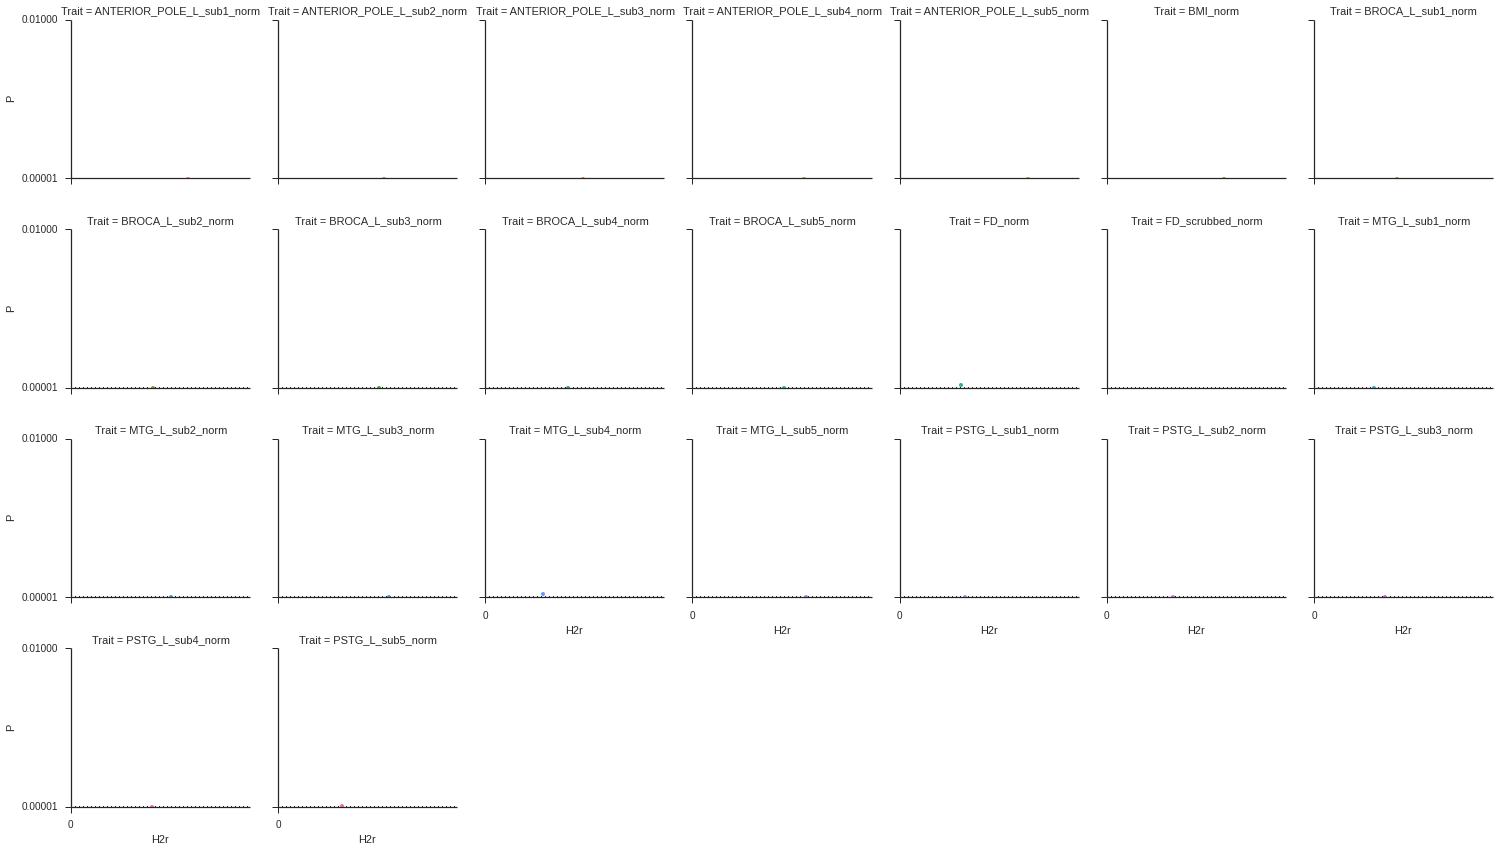

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(out_herit_df, col="Trait", hue="Trait", col_wrap=7, size=3)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".0005")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "H2r", "P", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[0.00001, 0.01],
         xlim=(0, 0.8), ylim=(0.00001, 0.01))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)